In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\data_loader.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Raw_Data\hotel_bookings_updated_2024.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,16:40.9,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,56:21.5,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,46:25.7,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07:10.1,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,27:32.5,Lucknow


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'city']


| Column                         | Qisqa izoh                                                |
| ------------------------------ | --------------------------------------------------------- |
| hotel                          | Mehmonxona nomi yoki turi                                 |
| is_canceled                    | Buyurtma bekor qilinganmi (1 = ha, 0 = yo‘q)              |
| lead_time                      | Buyurtma va kelish sanasi orasidagi kunlar soni           |
| arrival_date_year              | Kelish yili                                               |
| arrival_date_month             | Kelish oyi                                                |
| arrival_date_week_number       | Kelish haftasining raqami                                 |
| arrival_date_day_of_month      | Kelish kunining raqami                                    |
| stays_in_weekend_nights        | Dam olish kunlari kechalar soni                           |
| stays_in_week_nights           | Ish kunlari kechalar soni                                 |
| adults                         | Kattalar soni                                             |
| children                       | Bolalar soni                                              |
| babies                         | Chaqlar soni                                              |
| meal                           | Taom rejasi (BB, HB, FB va hk.)                           |
| country                        | Mijozning mamlakati                                       |
| market_segment                 | Bozor segmenti (Online, Corporate va hk.)                 |
| distribution_channel           | Buyurtma kanali (Direct, TA/TO va hk.)                    |
| is_repeated_guest              | Takroriy mehmon (1 = ha, 0 = yo‘q)                        |
| previous_cancellations         | Oldingi bekor qilingan buyurtmalar soni                   |
| previous_bookings_not_canceled | Oldingi bekor qilinmagan buyurtmalar soni                 |
| reserved_room_type             | Buyurtma qilingan xona turi                               |
| assigned_room_type             | Tayinlangan xona turi                                     |
| booking_changes                | Buyurtma o‘zgarishlari soni                               |
| deposit_type                   | Oldindan to‘lov turi (No Deposit, Refundable, Non Refund) |
| agent                          | Buyurtmani qo‘shgan agent IDsi                            |
| company                        | Buyurtmani qo‘shgan kompaniya IDsi                        |
| days_in_waiting_list           | Kutish ro‘yxatidagi kunlar soni                           |
| customer_type                  | Mijoz turi (Transient, Contract, Group va hk.)            |
| adr                            | O‘rtacha kunlik narx (Average Daily Rate)                 |
| required_car_parking_spaces    | Talab qilingan avtoturargoh joylari soni                  |
| total_of_special_requests      | Maxsus talablar soni                                      |
| reservation_status             | Buyurtma holati (Check-Out, Canceled, No-Show)            |
| reservation_status_date        | Buyurtma holati sanasi                                    |
| city                           | Shahar nomi                                               |


# Missing Values Analysis

In [16]:
# Har bir ustundagi NaN soni
missing_count = df.isnull().sum()

# Faqat NaN mavjud ustunlarni filterlash
missing_count = missing_count[missing_count > 0]

# Missing value foizini hisoblash
missing_percent = (missing_count / len(df) * 100).sort_values(ascending=False)

# Natijani chiqarish
print("Missing values (faqat NaN mavjud ustunlar):")
print(pd.concat([missing_count, missing_percent], axis=1, keys=['Missing Count', 'Missing %']))


Missing values (faqat NaN mavjud ustunlar):
          Missing Count  Missing %
children              4   0.003350
country             488   0.408744
agent             16340  13.686238
company          112593  94.306893


In [18]:
import pandas as pd

# Har bir ustundagi duplicated qiymatlarni hisoblash
duplicated_info = {}
for col in df.columns:
    # duplicated bo'lgan qiymatlar soni
    dup_count = df.duplicated(subset=[col], keep=False).sum()
    if dup_count > 0:
        duplicated_info[col] = dup_count

# Natijani chiqarish
print("Duplicated qiymatlar mavjud ustunlar va sonlari:")
for col, count in duplicated_info.items():
    print(f"{col}: {count}")


Duplicated qiymatlar mavjud ustunlar va sonlari:
hotel: 119390
is_canceled: 119390
lead_time: 119378
arrival_date_year: 119390
arrival_date_month: 119390
arrival_date_week_number: 119390
arrival_date_day_of_month: 119390
stays_in_weekend_nights: 119388
stays_in_week_nights: 119382
adults: 119385
children: 119389
babies: 119388
meal: 119390
country: 119360
market_segment: 119390
distribution_channel: 119390
is_repeated_guest: 119390
previous_cancellations: 119389
previous_bookings_not_canceled: 119353
reserved_room_type: 119390
assigned_room_type: 119389
booking_changes: 119387
deposit_type: 119390
agent: 119340
company: 119310
days_in_waiting_list: 119371
customer_type: 119390
adr: 115249
required_car_parking_spaces: 119390
total_of_special_requests: 119390
reservation_status: 119390
reservation_status_date: 114898
city: 119390


# Unikal mehmonxona turlarini hisoblash

In [19]:
import pandas as pd

# Unikal mehmonxona turlarini hisoblash
unique_hotels = df['hotel'].nunique()
print(f"Datasetda jami {unique_hotels} ta mehmonxona turi mavjud.")

# Agar mehmonxona nomlarini ham ko‘rmoqchi bo‘lsangiz
print("Mehmonxonalar ro‘yxati:")
print(df['hotel'].unique())


Datasetda jami 30 ta mehmonxona turi mavjud.
Mehmonxonalar ro‘yxati:
['Resort Hotel - Chandigarh' 'Resort Hotel - Mumbai'
 'Resort Hotel - Delhi' 'Resort Hotel - Kolkata' 'Resort Hotel - Lucknow'
 'Resort Hotel - Indore' 'Resort Hotel - Ahmedabad' 'Resort Hotel - Pune'
 'Resort Hotel - Chennai' 'Resort Hotel - Bhopal'
 'Resort Hotel - Hyderabad' 'Resort Hotel - Kochi'
 'Resort Hotel - Bangalore' 'Resort Hotel - Jaipur' 'Resort Hotel - Goa'
 'City Hotel - Ahmedabad' 'City Hotel - Indore' 'City Hotel - Jaipur'
 'City Hotel - Pune' 'City Hotel - Hyderabad' 'City Hotel - Bhopal'
 'City Hotel - Kolkata' 'City Hotel - Mumbai' 'City Hotel - Bangalore'
 'City Hotel - Lucknow' 'City Hotel - Chennai' 'City Hotel - Chandigarh'
 'City Hotel - Delhi' 'City Hotel - Kochi' 'City Hotel - Goa']


# Eng ko'p  va Eng kam buyurtma qabul qilgan mehmonxona

In [ ]:
import pandas as pd

# Mehmonxona bo'yicha buyurtmalar soni
hotel_counts = df['hotel'].value_counts()

# Eng ko'p buyurtma qabul qilgan mehmonxona
most_booked_hotel = hotel_counts.idxmax()
most_booked_count = hotel_counts.max()

# Eng kam buyurtma qabul qilgan mehmonxona
least_booked_hotel = hotel_counts.idxmin()
least_booked_count = hotel_counts.min()

print(f"Eng ko'p buyurtma qabul qilgan mehmonxona: {most_booked_hotel} ({most_booked_count} ta buyurtma)")
print(f"Eng kam buyurtma qabul qilgan mehmonxona: {least_booked_hotel} ({least_booked_count} ta buyurtma)")

Eng ko'p buyurtma qabul qilgan mehmonxona: City Hotel - Ahmedabad (5405 ta buyurtma)
Eng kam buyurtma qabul qilgan mehmonxona: Resort Hotel - Lucknow (2579 ta buyurtma)


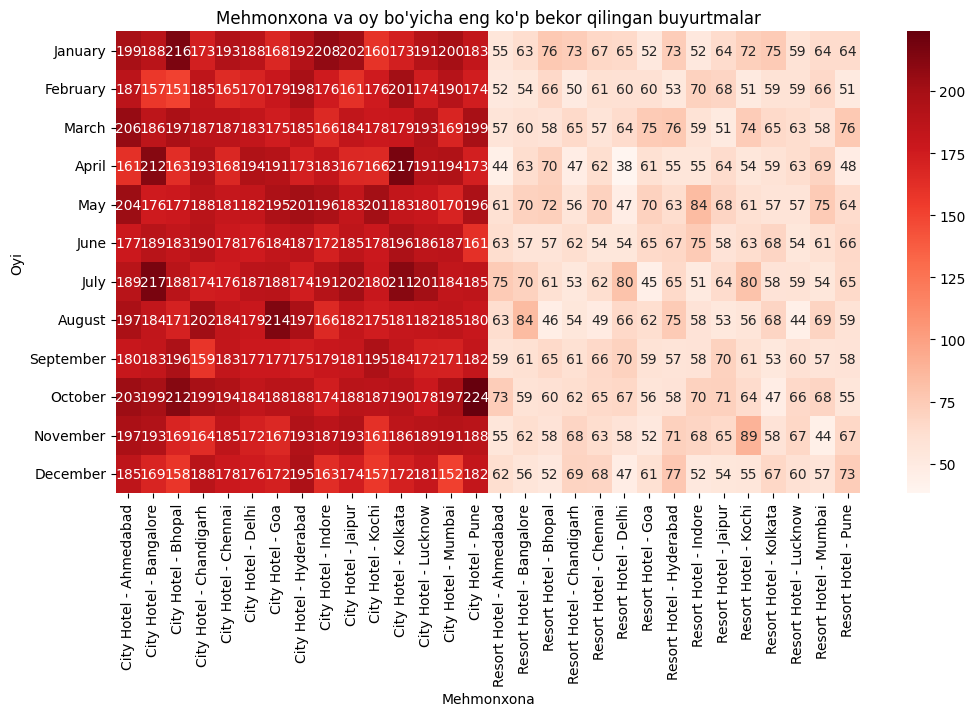

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Oyni tartib bilan berish
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Faqat bekor qilingan buyurtmalarni tanlash
canceled_df = df[df['is_canceled'] == 1]

# Mehmonxona va kelish oyi bo'yicha bekor qilingan buyurtmalar soni
canceled_counts = canceled_df.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='canceled_bookings')

# Oyni categorical qilib tartiblash
canceled_counts['arrival_date_month'] = pd.Categorical(canceled_counts['arrival_date_month'],
                                                       categories=month_order, ordered=True)

# Pivot table yaratish
pivot_table = canceled_counts.pivot(index='arrival_date_month', columns='hotel', values='canceled_bookings')

# Heatmap orqali vizualizatsiya
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Reds')
plt.title("Mehmonxona va oy bo'yicha eng ko'p bekor qilingan buyurtmalar")
plt.ylabel("Oyi")
plt.xlabel("Mehmonxona")
plt.show()


Eng ko'p bekor qilingan buyurtma:
hotel                 City Hotel - Pune
arrival_date_month              October
canceled_bookings                   224
Name: 178, dtype: object


C:\maya_temp\ipykernel_412\2594356534.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Peak Cancelation'], y=[max_canceled_row['canceled_bookings']], palette='Reds')


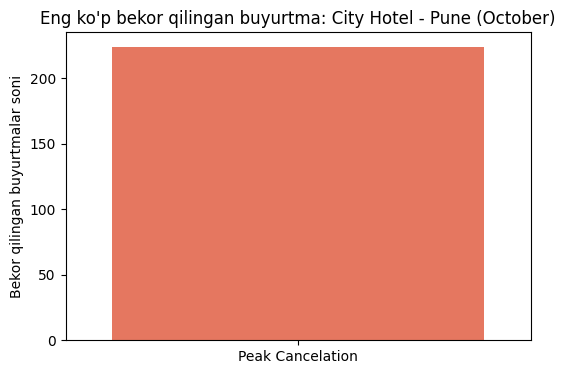

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Oyni tartib bilan berish
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Faqat bekor qilingan buyurtmalar
canceled_df = df[df['is_canceled'] == 1]

# Mehmonxona va kelish oyi bo'yicha bekor qilingan buyurtmalar soni
canceled_counts = canceled_df.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='canceled_bookings')

# Oyni categorical qilib tartiblash
canceled_counts['arrival_date_month'] = pd.Categorical(canceled_counts['arrival_date_month'],
                                                       categories=month_order, ordered=True)

# Eng ko'p bekor qilingan buyurtma
max_canceled_row = canceled_counts.loc[canceled_counts['canceled_bookings'].idxmax()]

print("Eng ko'p bekor qilingan buyurtma:")
print(max_canceled_row)

# Vizual tarzda ko'rsatish (bitta bar)
plt.figure(figsize=(6,4))
sns.barplot(x=['Peak Cancelation'], y=[max_canceled_row['canceled_bookings']], palette='Reds')
plt.title(f"Eng ko'p bekor qilingan buyurtma: {max_canceled_row['hotel']} ({max_canceled_row['arrival_date_month']})")
plt.ylabel("Bekor qilingan buyurtmalar soni")
plt.show()


Eng kam bekor qilingan buyurtma:
hotel                 Resort Hotel - Delhi
arrival_date_month                   April
canceled_bookings                       38
Name: 240, dtype: object


C:\maya_temp\ipykernel_412\641851521.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Lowest Cancelation'], y=[min_canceled_row['canceled_bookings']], palette='Greens')


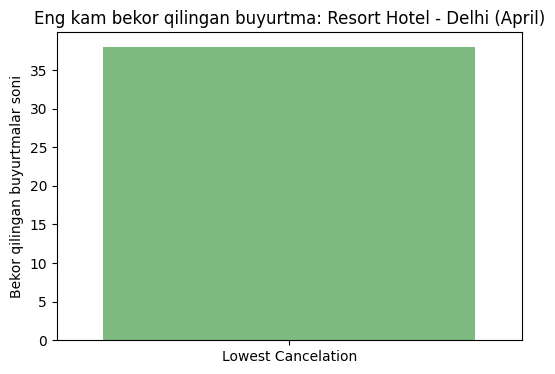

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Oyni tartib bilan berish
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Faqat bekor qilingan buyurtmalar
canceled_df = df[df['is_canceled'] == 1]

# Mehmonxona va kelish oyi bo'yicha bekor qilingan buyurtmalar soni
canceled_counts = canceled_df.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='canceled_bookings')

# Oyni categorical qilib tartiblash
canceled_counts['arrival_date_month'] = pd.Categorical(canceled_counts['arrival_date_month'],
                                                       categories=month_order, ordered=True)

# Eng kam bekor qilingan buyurtma
min_canceled_row = canceled_counts.loc[canceled_counts['canceled_bookings'].idxmin()]

print("Eng kam bekor qilingan buyurtma:")
print(min_canceled_row)

# Vizual tarzda ko'rsatish (bitta bar)
plt.figure(figsize=(6,4))
sns.barplot(x=['Lowest Cancelation'], y=[min_canceled_row['canceled_bookings']], palette='Greens')
plt.title(f"Eng kam bekor qilingan buyurtma: {min_canceled_row['hotel']} ({min_canceled_row['arrival_date_month']})")
plt.ylabel("Bekor qilingan buyurtmalar soni")
plt.show()


Datasetda jami 177 ta mamlakat mavjud.


C:\maya_temp\ipykernel_412\235430721.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


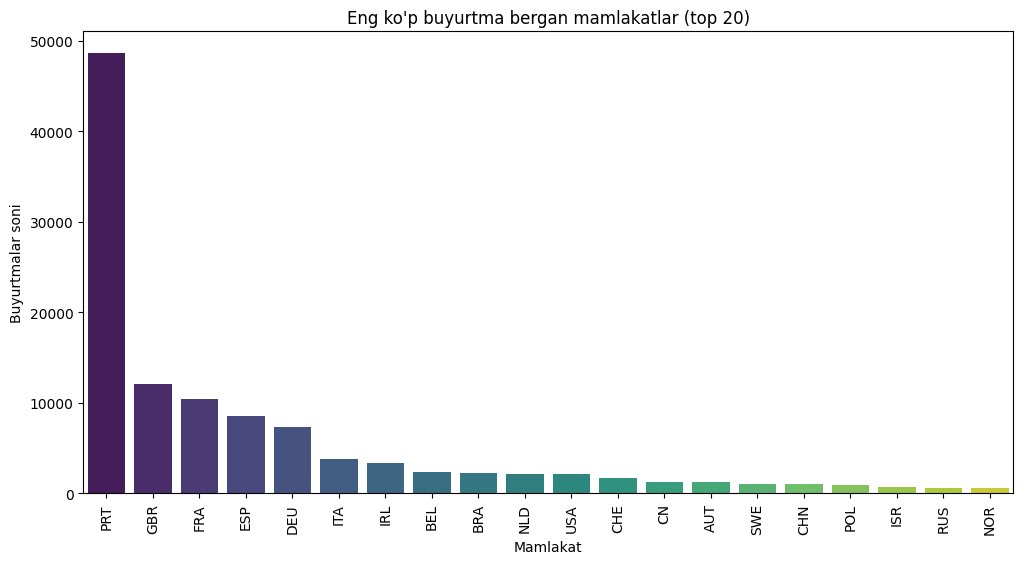

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mamlakatlar soni
unique_countries = df['country'].nunique()
print(f"Datasetda jami {unique_countries} ta mamlakat mavjud.")

# Eng ko'p buyurtma bergan mamlakatlarni ko'rsatish
top_countries = df['country'].value_counts().head(20)  # top 20 mamlakat

# Bar plot orqali vizualizatsiya
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Eng ko'p buyurtma bergan mamlakatlar (top 20)")
plt.ylabel("Buyurtmalar soni")
plt.xlabel("Mamlakat")
plt.show()


Mijoz turlari soni:
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


C:\maya_temp\ipykernel_412\3955887805.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='Set2')


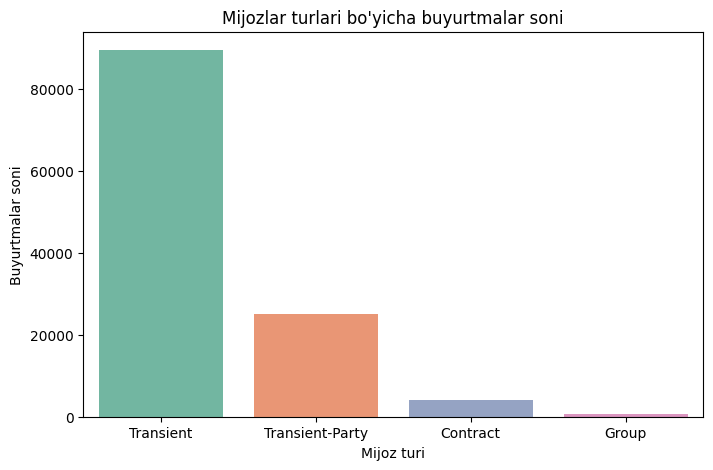

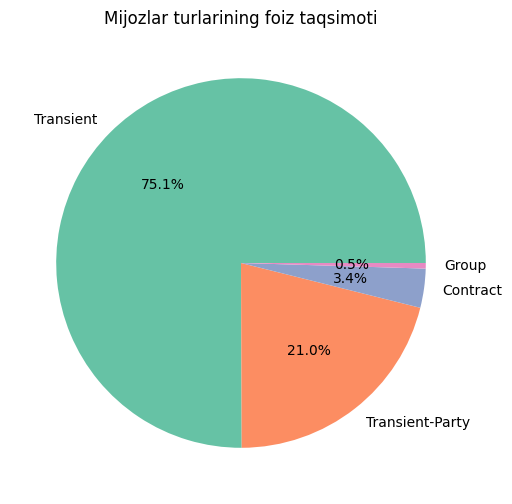

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mijoz turlarini sanash
customer_counts = df['customer_type'].value_counts()
print("Mijoz turlari soni:")
print(customer_counts)

# Vizualizatsiya (bar plot)
plt.figure(figsize=(8,5))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='Set2')
plt.title("Mijozlar turlari bo'yicha buyurtmalar soni")
plt.ylabel("Buyurtmalar soni")
plt.xlabel("Mijoz turi")
plt.show()

# Pie chart orqali ham vizualizatsiya
plt.figure(figsize=(6,6))
plt.pie(customer_counts.values, labels=customer_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Mijozlar turlarining foiz taqsimoti")
plt.show()


| Mijoz turi      | Qisqa izoh                                                                              |
| --------------- | --------------------------------------------------------------------------------------- |
| Transient       | Yakka mehmon (individual) buyurtma qilganlar                                            |
| Transient-Party | Yakka mehmon, lekin bir necha kishi bilan birga (party) buyurtma qilganlar              |
| Contract        | Korporativ yoki kompaniya shartnomasi orqali buyurtma qilganlar                         |
| Group           | Guruh sifatida buyurtma qilganlar (masalan, konferensiya yoki ko‘p xonali rezervatsiya) |


To'lov turlari soni:
deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64


C:\maya_temp\ipykernel_412\1074300590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deposit_counts.index, y=deposit_counts.values, palette='pastel')


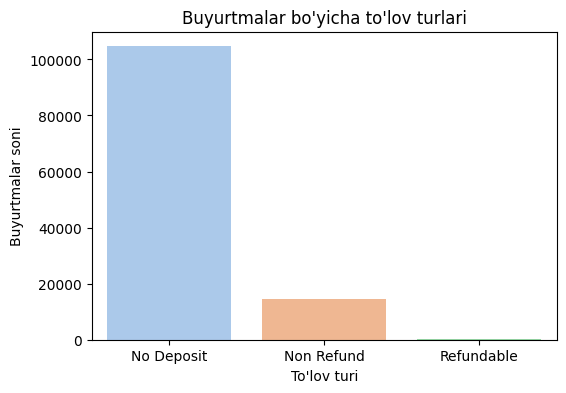

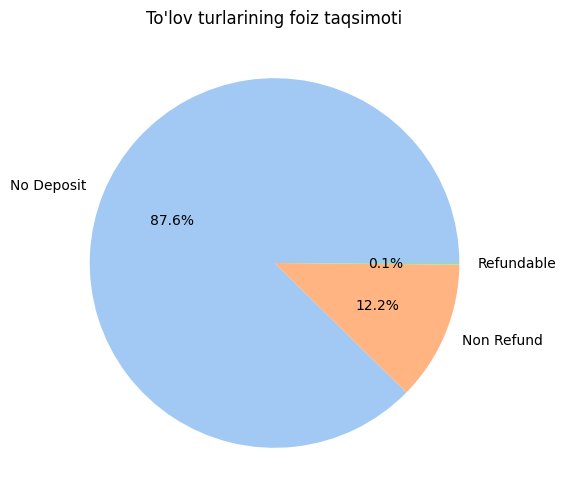

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To'lov turlari bo'yicha buyurtmalar soni
deposit_counts = df['deposit_type'].value_counts()
print("To'lov turlari soni:")
print(deposit_counts)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=deposit_counts.index, y=deposit_counts.values, palette='pastel')
plt.title("Buyurtmalar bo'yicha to'lov turlari")
plt.ylabel("Buyurtmalar soni")
plt.xlabel("To'lov turi")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(deposit_counts.values, labels=deposit_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("To'lov turlarining foiz taqsimoti")
plt.show()


Shaharlar bo'yicha buyurtmalar soni:
city
Bhopal        8104
Jaipur        8038
Ahmedabad     8028
Pune          7992
Hyderabad     7981
Delhi         7978
Chandigarh    7978
Kolkata       7976
Goa           7973
Mumbai        7935
Chennai       7925
Bangalore     7897
Kochi         7889
Lucknow       7869
Indore        7827
Name: count, dtype: int64


C:\maya_temp\ipykernel_412\3149970760.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')


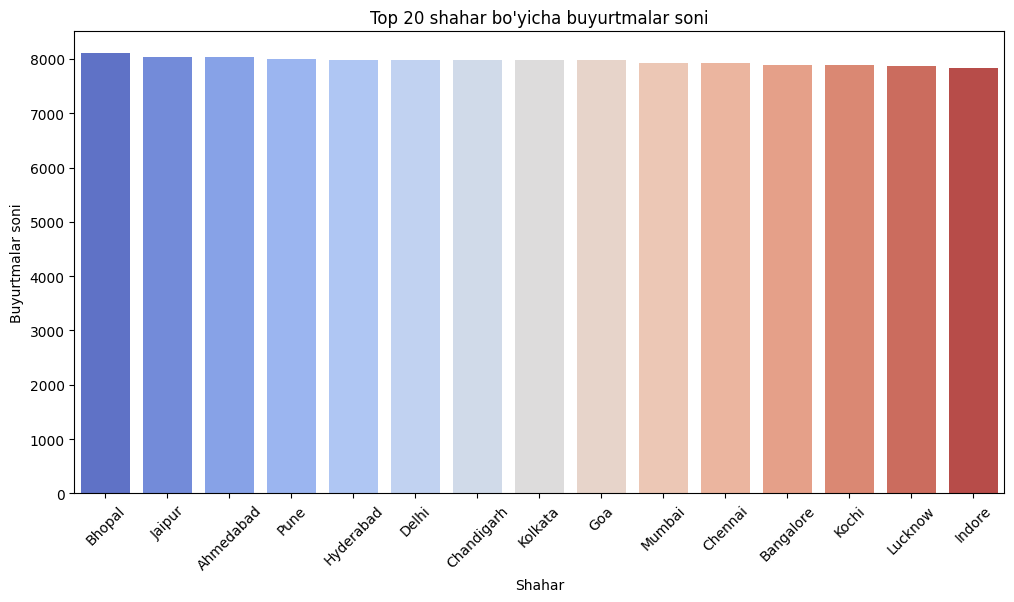

C:\maya_temp\ipykernel_412\3149970760.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=canceled_by_city.index, y=canceled_by_city.values, palette='Reds')


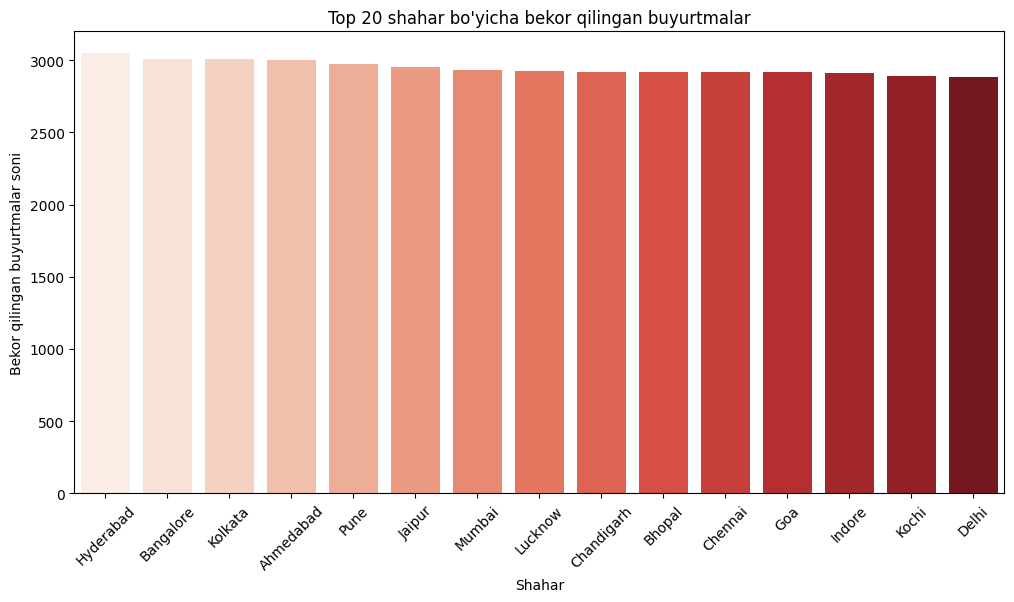

C:\maya_temp\ipykernel_412\3149970760.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_ratio.index, y=cancel_ratio.values*100, palette='Reds')


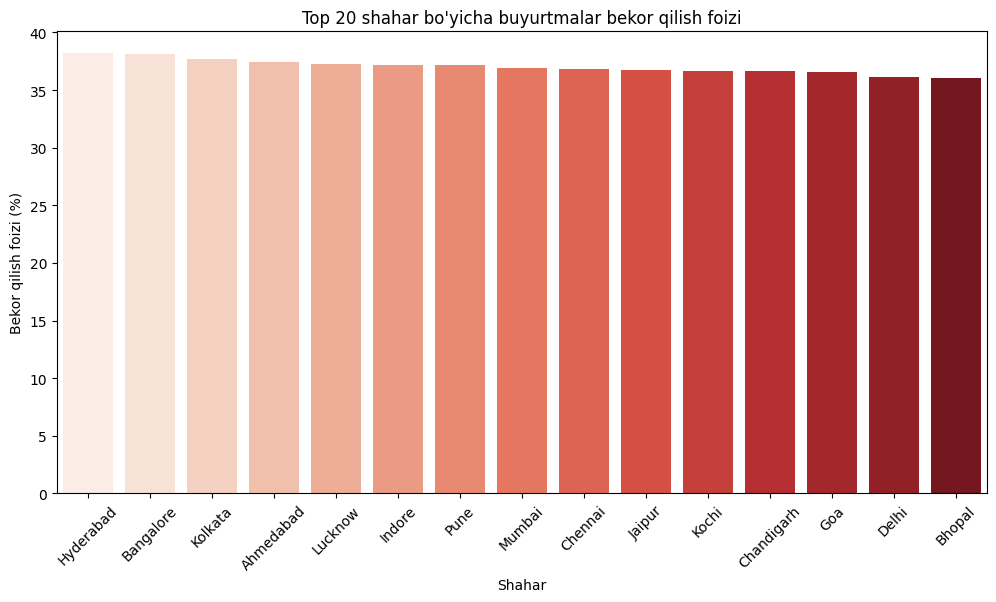

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Har bir shahar bo'yicha buyurtmalar soni
city_counts = df['city'].value_counts()
print("Shaharlar bo'yicha buyurtmalar soni:")
print(city_counts)

# Top 20 shaharni vizual ko'rsatish
top_cities = city_counts.head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 20 shahar bo'yicha buyurtmalar soni")
plt.ylabel("Buyurtmalar soni")
plt.xlabel("Shahar")
plt.show()

# Bekor qilingan buyurtmalarni shaharga ko'ra tahlil qilish
canceled_by_city = df[df['is_canceled'] == 1]['city'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=canceled_by_city.index, y=canceled_by_city.values, palette='Reds')
plt.xticks(rotation=45)
plt.title("Top 20 shahar bo'yicha bekor qilingan buyurtmalar")
plt.ylabel("Bekor qilingan buyurtmalar soni")
plt.xlabel("Shahar")
plt.show()

# Bekor qilish foizi
cancel_ratio = (df[df['is_canceled'] == 1].groupby('city').size() / df.groupby('city').size()).sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=cancel_ratio.index, y=cancel_ratio.values*100, palette='Reds')
plt.xticks(rotation=45)
plt.title("Top 20 shahar bo'yicha buyurtmalar bekor qilish foizi")
plt.ylabel("Bekor qilish foizi (%)")
plt.xlabel("Shahar")
plt.show()

# Target Distribution (is_canceled)

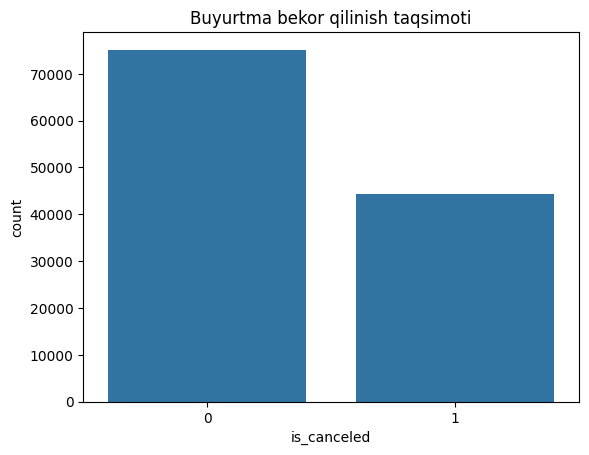

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x='is_canceled', data=df)
plt.title("Buyurtma bekor qilinish taqsimoti")
plt.show()

# Proportion
print(df['is_canceled'].value_counts(normalize=True))


# Numeric Features Analysis

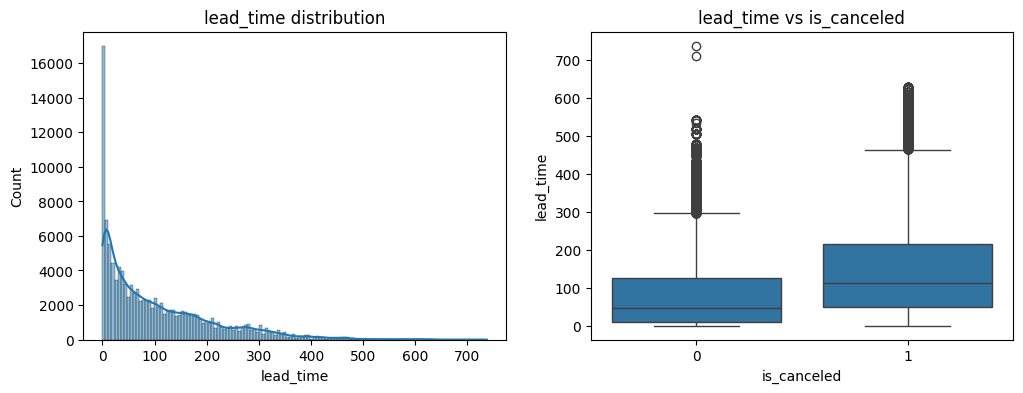

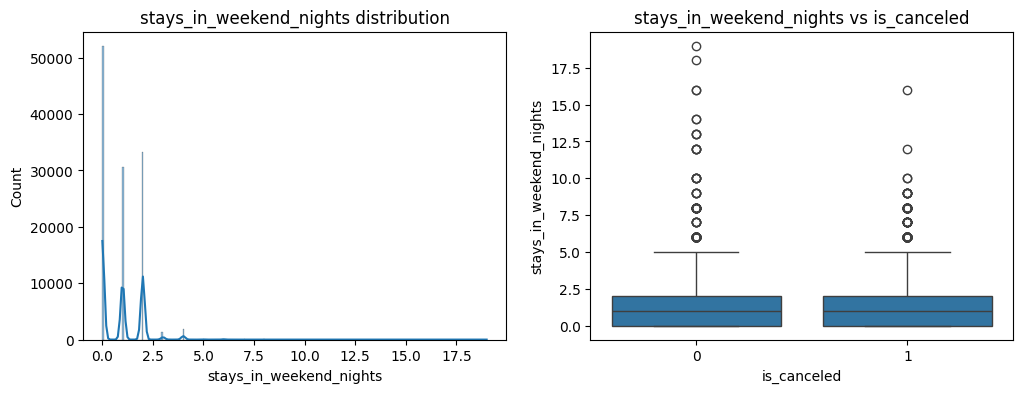

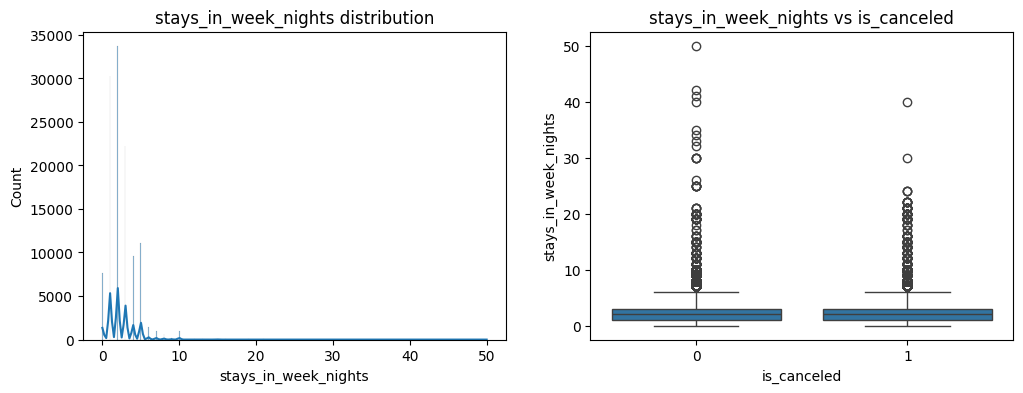

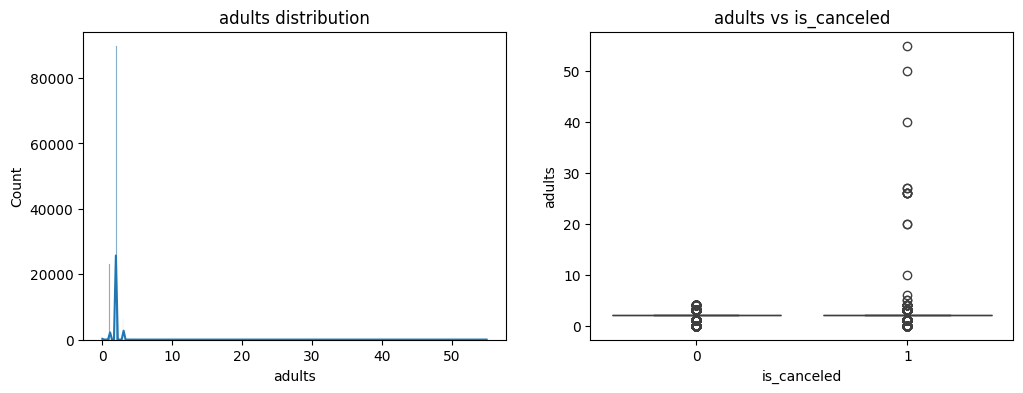

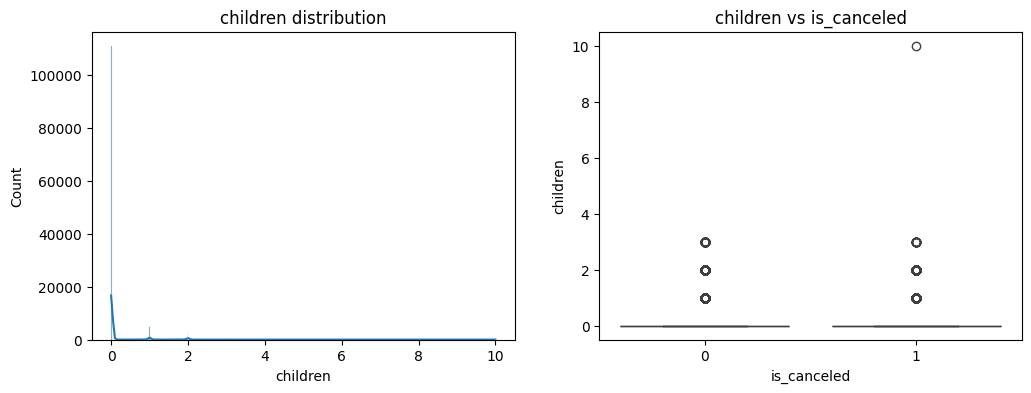

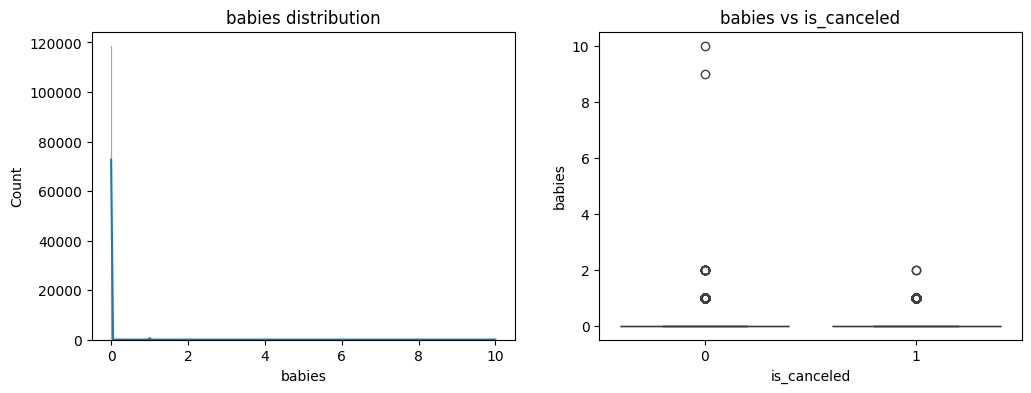

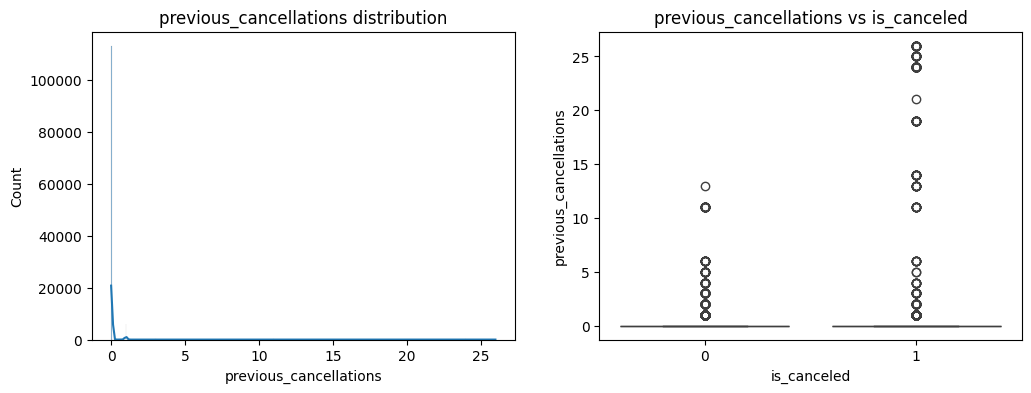

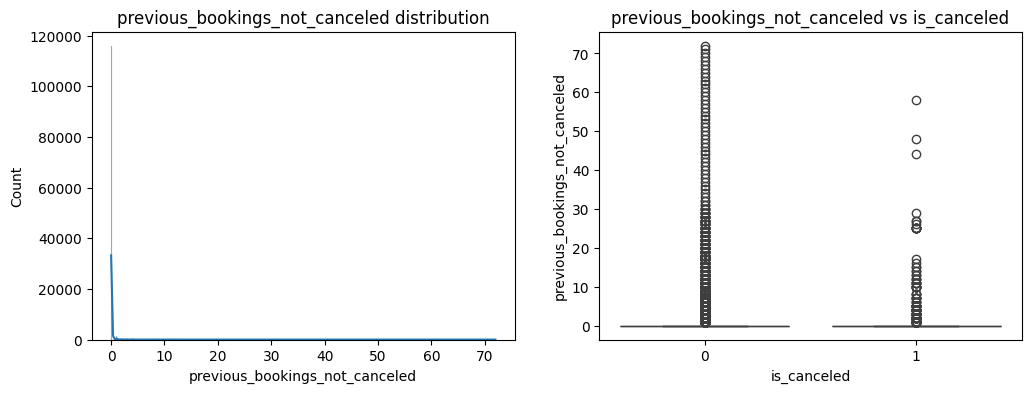

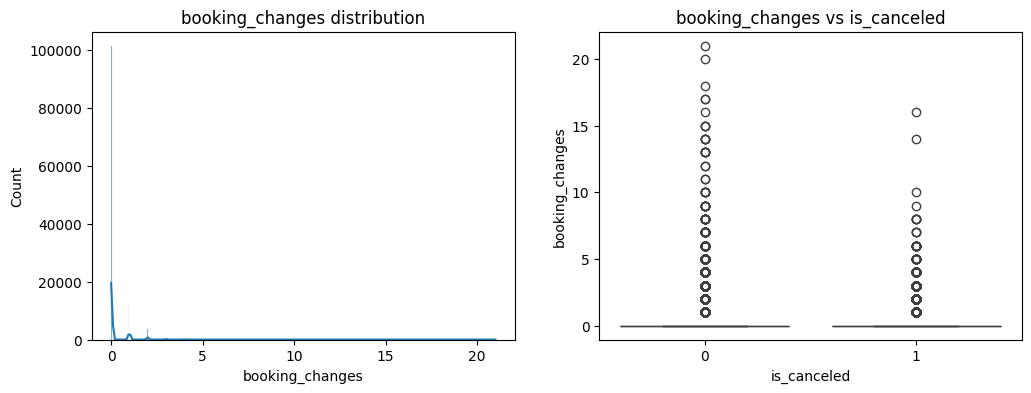

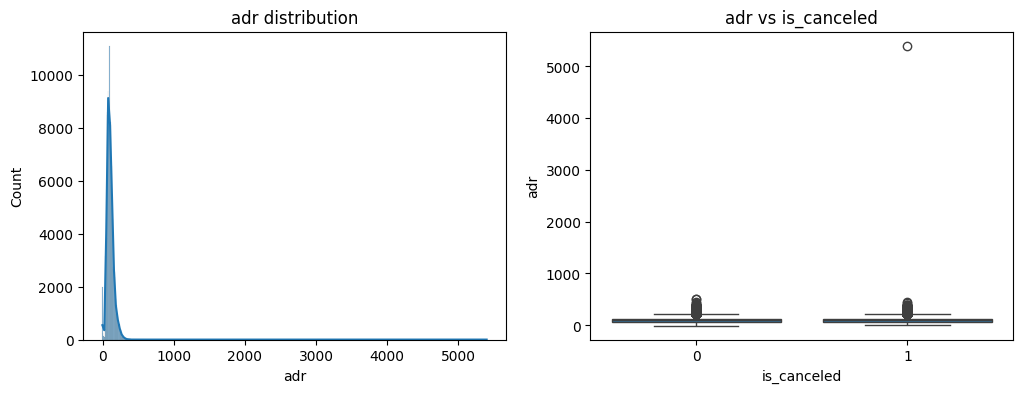

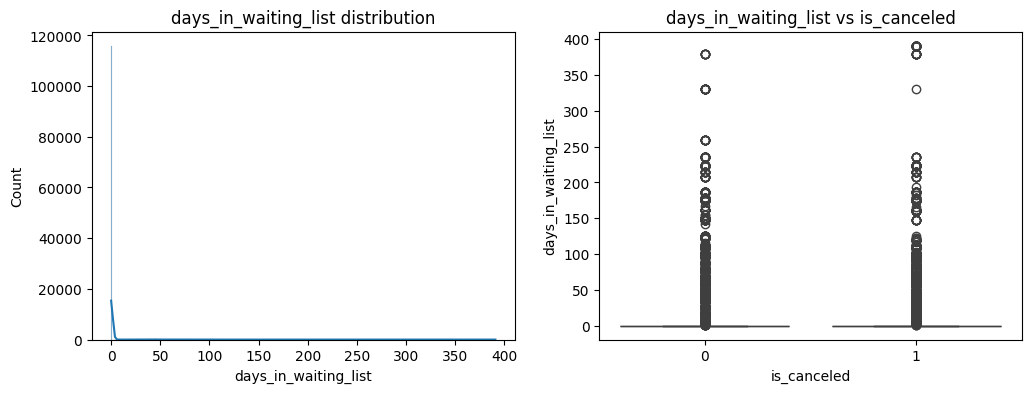

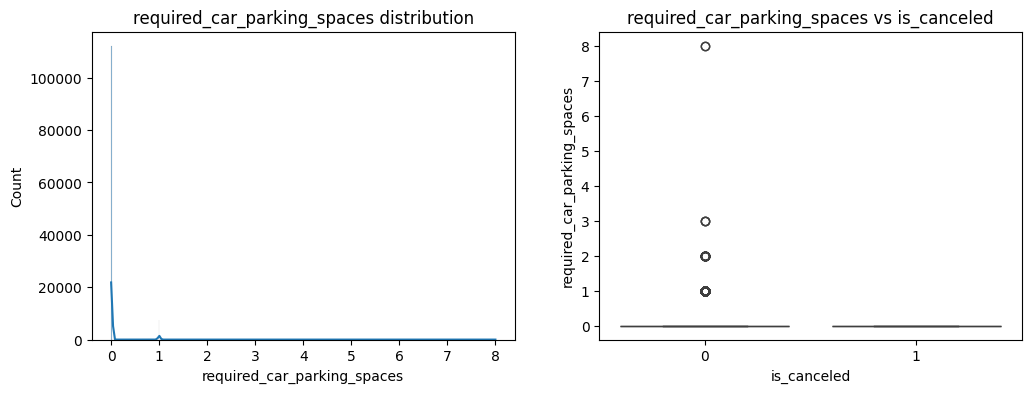

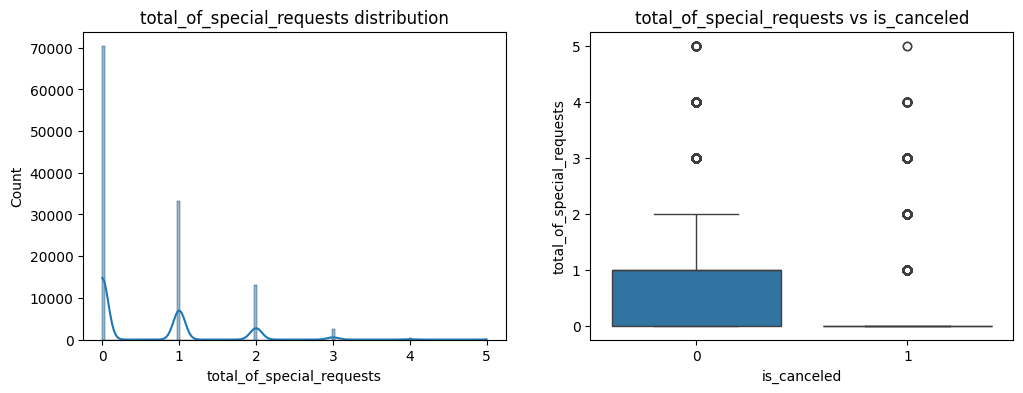

In [10]:
numeric_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                'adults', 'children', 'babies', 'previous_cancellations', 
                'previous_bookings_not_canceled', 'booking_changes', 'adr', 
                'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Histogram va Boxplot
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='is_canceled', y=col, data=df)
    plt.title(f'{col} vs is_canceled')
    plt.show()


# Categorical Features Analysis

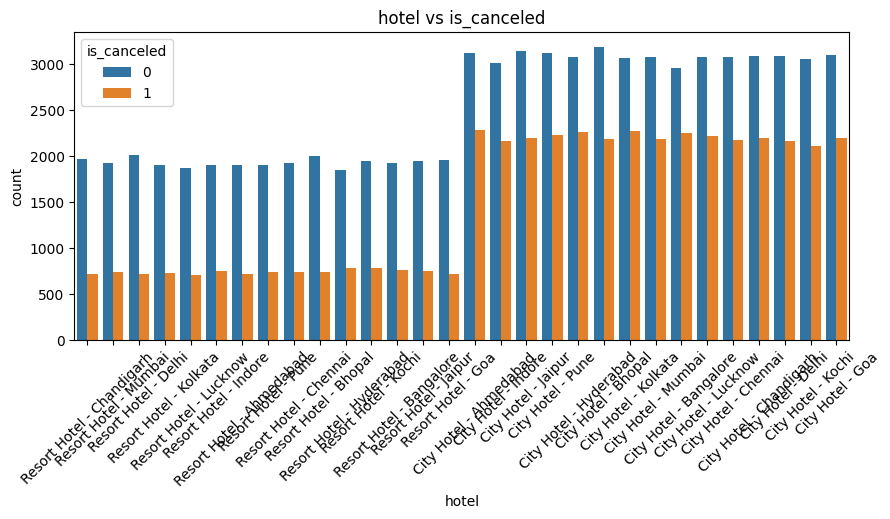

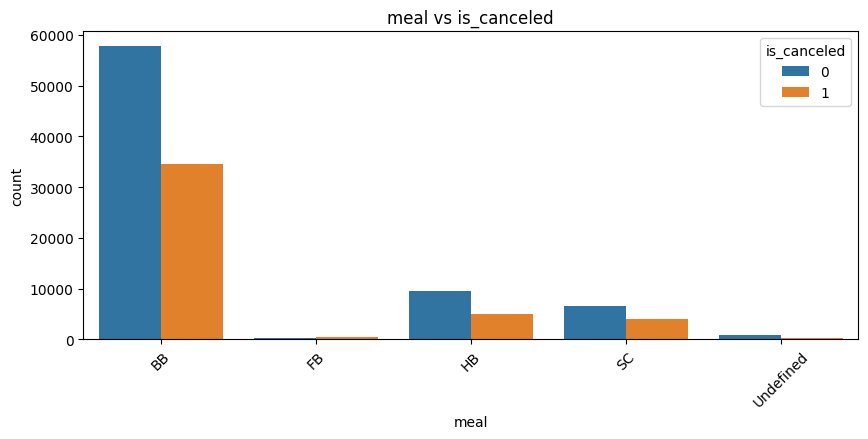

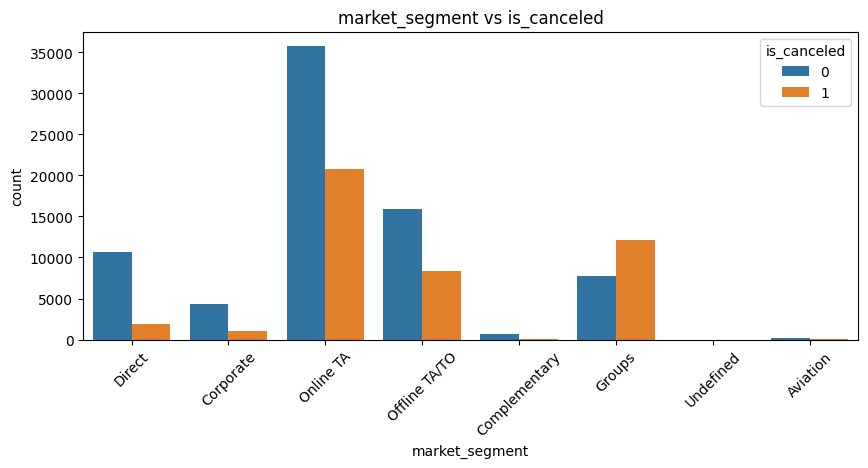

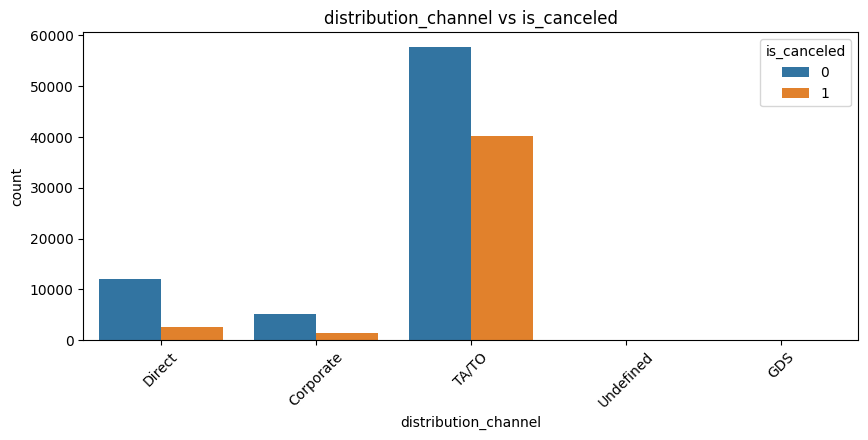

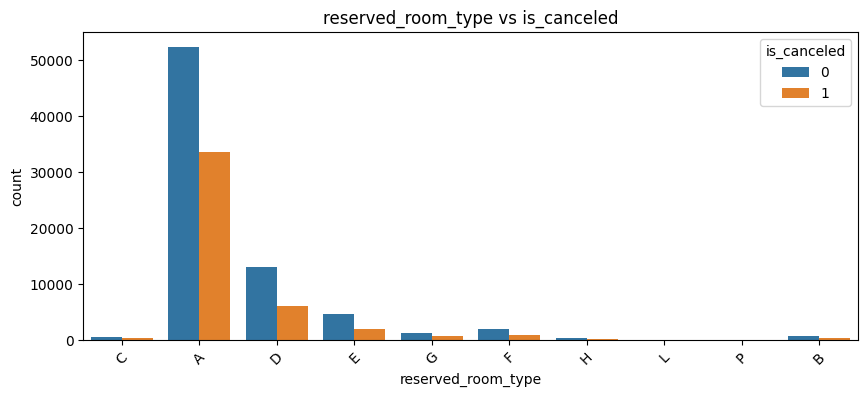

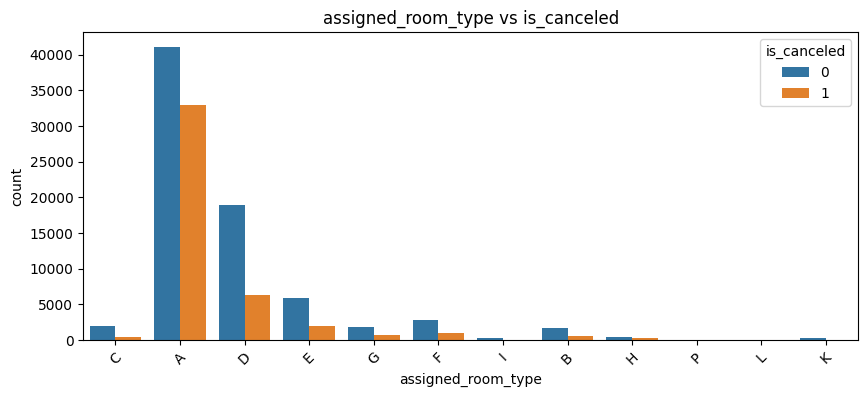

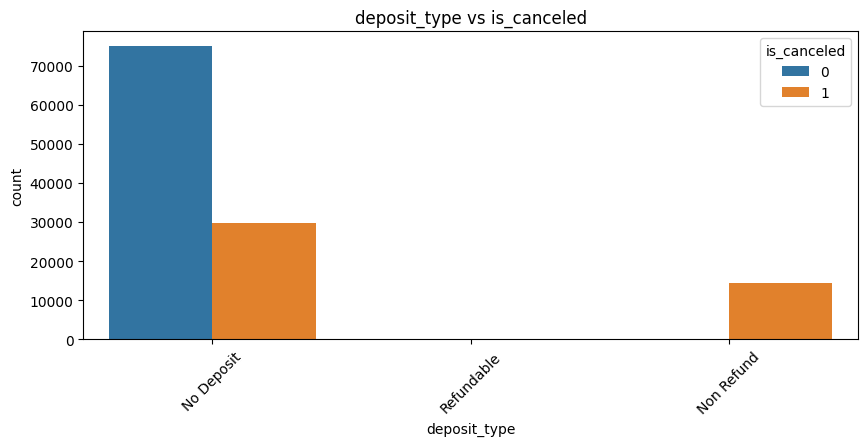

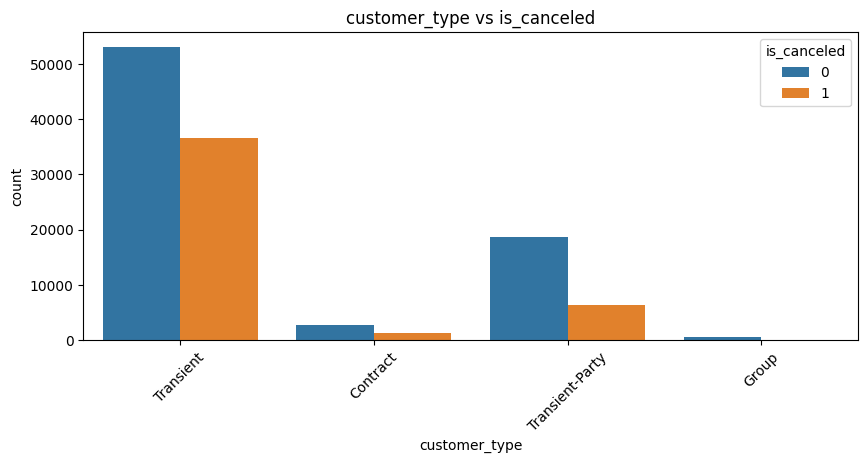

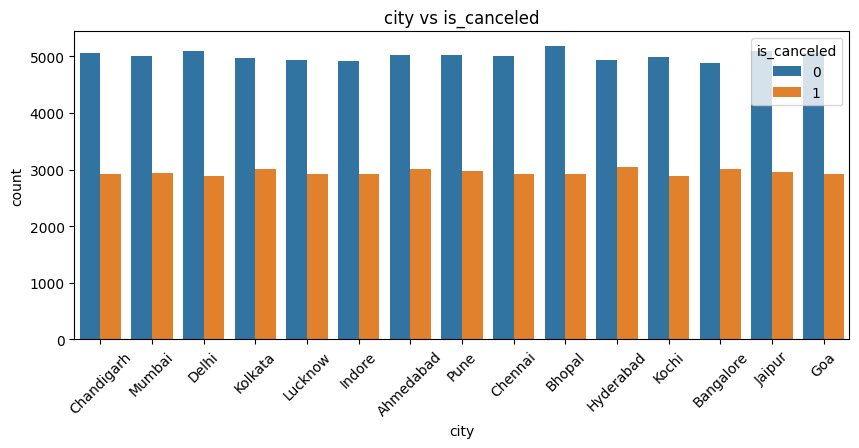

In [11]:
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                    'customer_type', 'city']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='is_canceled', data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs is_canceled')
    plt.show()


# Correlation Analysis

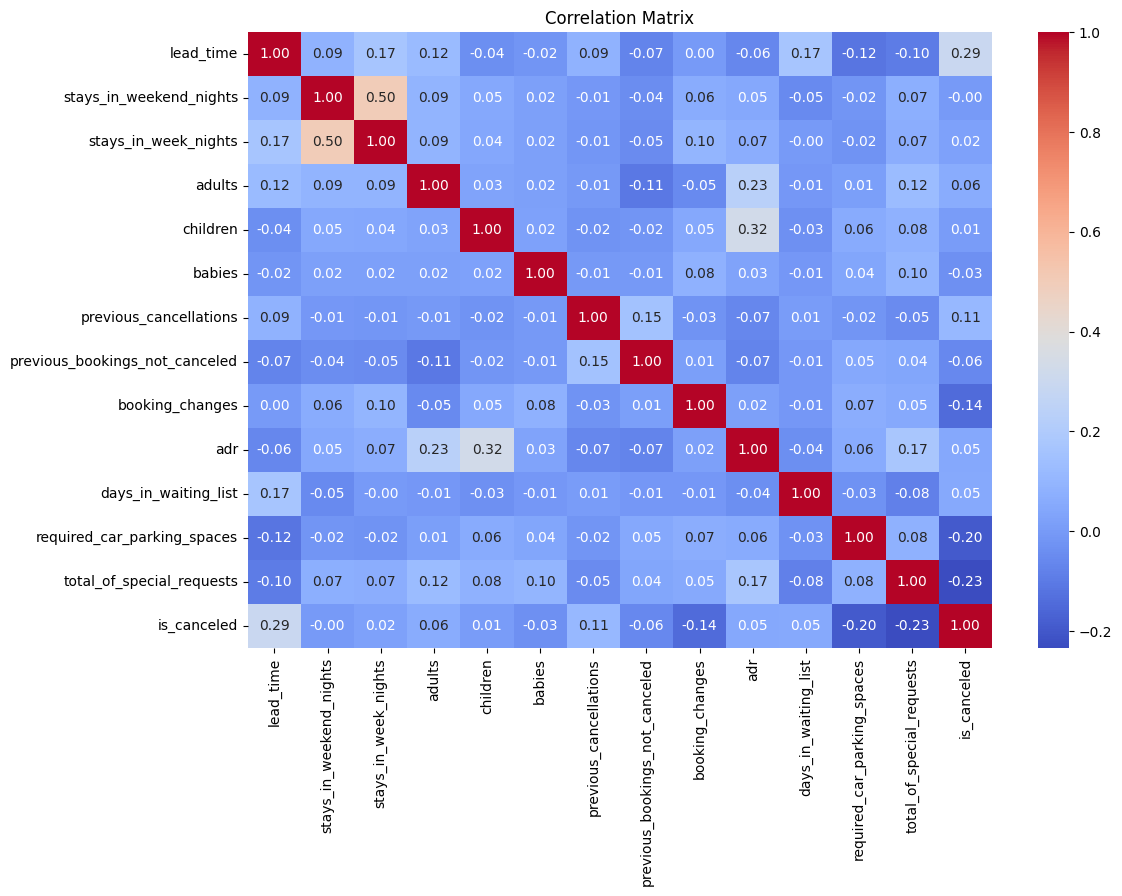

In [ ]:
corr = df[numeric_cols + ['is_canceled']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Time-based Analysis -- Mavsumiy tendensiyalarni aniqlash (peak months vs cancelation rate).

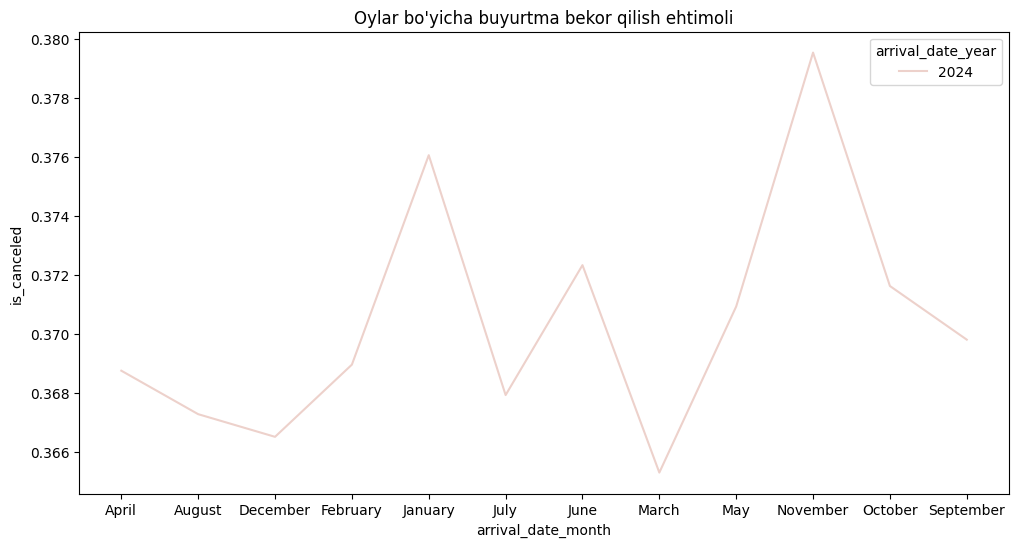

In [ ]:
monthly_cancel = df.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='is_canceled', hue='arrival_date_year', data=monthly_cancel)
plt.title("Oylar bo'yicha buyurtma bekor qilish ehtimoli")
plt.show()
